# ![CreditCardImage](./image-112.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
pd.set_option("display.max_columns",None)
import shutil
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardimage/image-112.png
/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
shutil.copy('/kaggle/input/creditcardimage/image-112.png', '/kaggle/working/image-112.png')

'/kaggle/working/image-112.png'

# LOAD DATASET

**Veri Setini Yükleme Ve İlk Beş Satır**

In [3]:
# Veri setini yükleme
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

# Veri setinin ilk 5 satırını görüntüleme
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Exploratory Data Analysis
**Keşifsel Veri Analizi**

In [4]:
# Veri setinin boyutları
print(df.shape)

# Eksik değer kontrolü
print(df.isnull().sum())

# Sınıf dağılımı
print(df['Class'].value_counts(normalize=True))


(568630, 31)
id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [5]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,-0.513556,0.892136,-1.153011,0.489197,-1.062488,0.207773,-0.917240,-0.936114,-0.823688,-0.330408,-0.621378,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


# Data Visualization

**Veri Görselleştirme**
Sınıf Ve Tutar değişkenlerimizi görselleştiriyoruz.
İki değişkeninde hemen hemen normal dağıldığını söylemek mümkün ve iki değişkenimiz için de ayrkırı değerimiz olmadığı ortada.

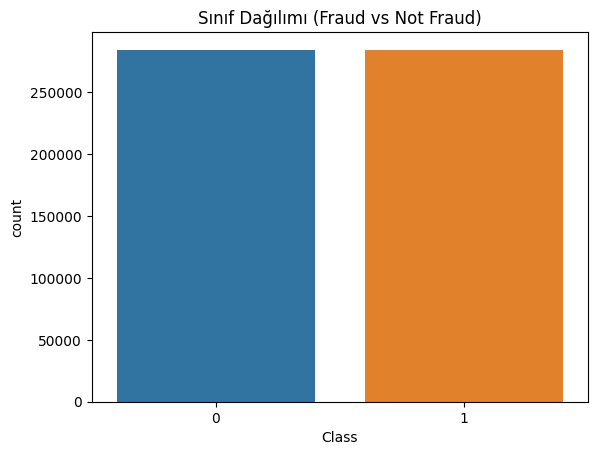

In [8]:
sns.countplot(x="Class", data=df)
plt.title("Sınıf Dağılımı (Fraud vs Not Fraud)")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


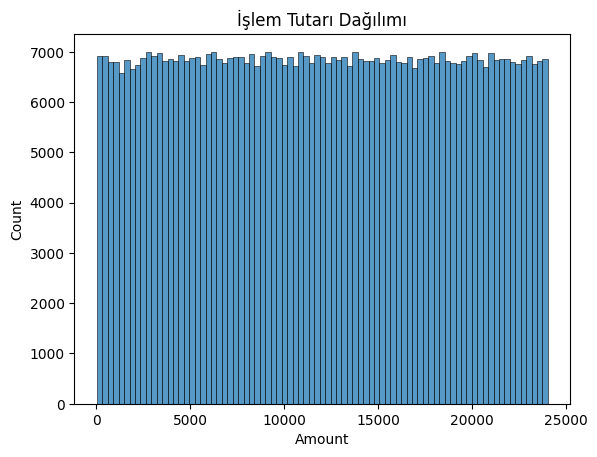

In [9]:
sns.histplot(df['Amount'])
plt.title("İşlem Tutarı Dağılımı")
plt.show()


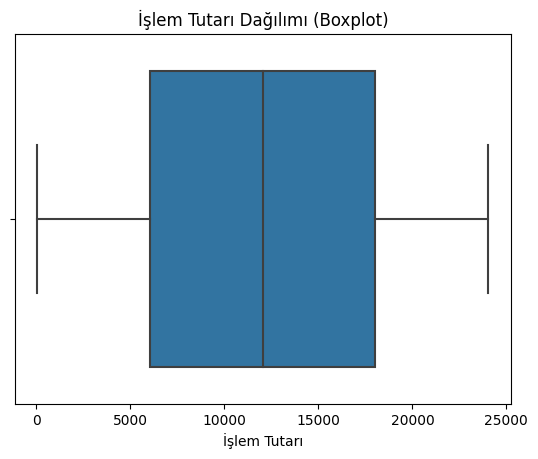

In [10]:
sns.boxplot(x=df['Amount'])
plt.title("İşlem Tutarı Dağılımı (Boxplot)")
plt.xlabel("İşlem Tutarı")
plt.show()


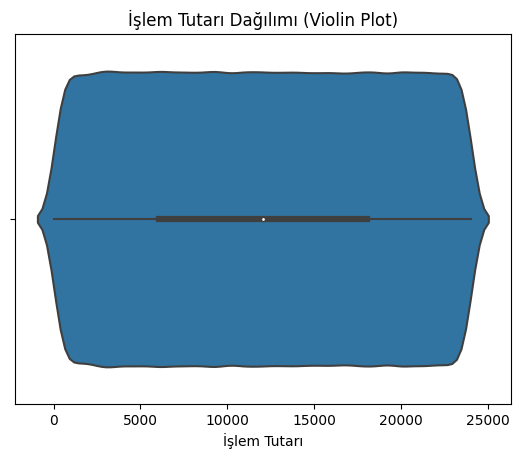

In [11]:
sns.violinplot(x=df['Amount'])
plt.title("İşlem Tutarı Dağılımı (Violin Plot)")
plt.xlabel("İşlem Tutarı")
plt.show()


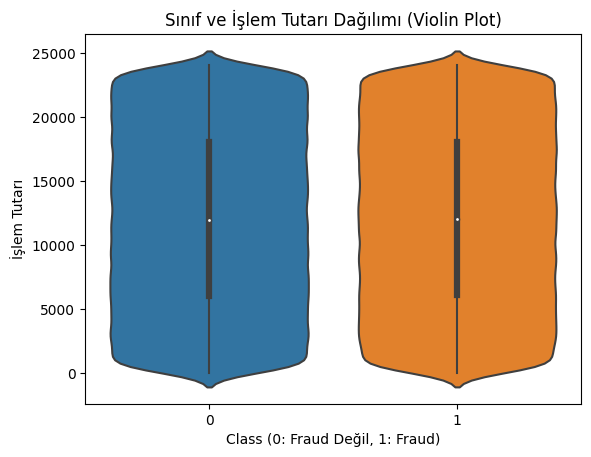

In [12]:
sns.violinplot(x='Class', y='Amount', data=df, scale='width')
plt.title("Sınıf ve İşlem Tutarı Dağılımı (Violin Plot)")
plt.xlabel("Class (0: Fraud Değil, 1: Fraud)")
plt.ylabel("İşlem Tutarı")
plt.show()

In [13]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [14]:
df.groupby('Class')['Amount'].mean()

Class
0    12026.313506
1    12057.601763
Name: Amount, dtype: float64

**İşlem tutarlarına göre doladırıcılık  durumuna  bakıtığımızda dolandırma tutarları normal işlem tutarlarına göre dafa fazla miktarda olduğu görünüyor bu miktar az da  olsa önemli bir fark yaratıyor.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


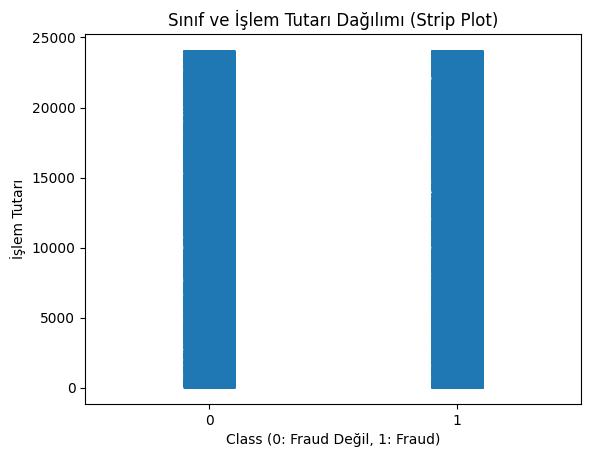

In [15]:
sns.stripplot(x='Class', y='Amount', data=df, jitter=True, size=2, alpha=0.7)
plt.title("Sınıf ve İşlem Tutarı Dağılımı (Strip Plot)")
plt.xlabel("Class (0: Fraud Değil, 1: Fraud)")
plt.ylabel("İşlem Tutarı")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


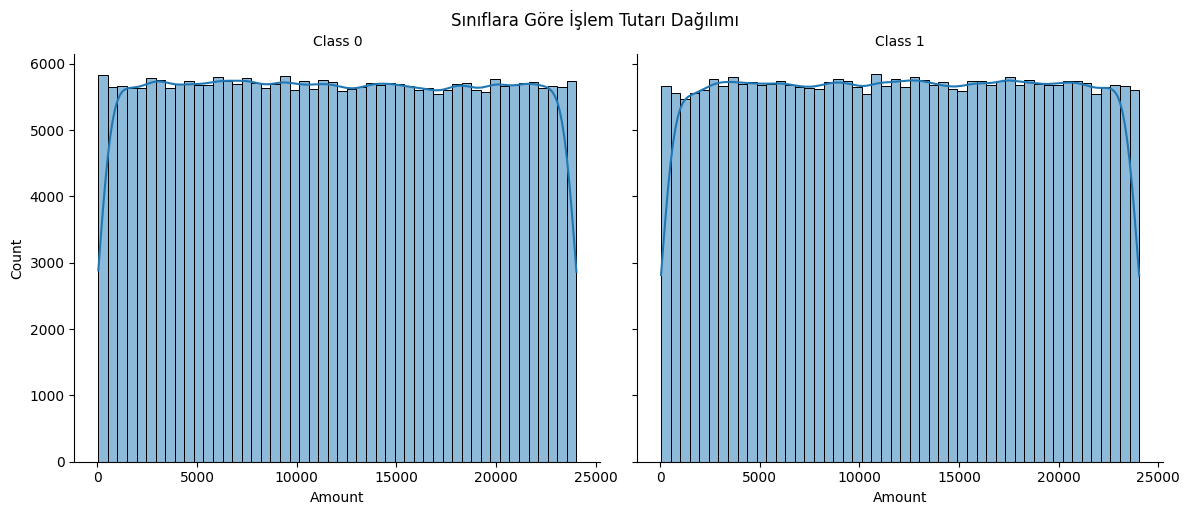

In [16]:
g = sns.FacetGrid(df, col="Class", height=5, aspect=1.2, palette="viridis")
g.map(sns.histplot, "Amount", bins=50, kde=True)
g.set_titles("Class {col_name}")
g.fig.suptitle("Sınıflara Göre İşlem Tutarı Dağılımı", y=1.02)
plt.show()


# Veriyi ön işlerken tekrar aykırı değerler ve null değerlerin olup olmadığını gözden geçiriyoruz 

In [17]:
# Null değerlerin toplamı
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Tutar Değişkeninin z-score ve Iqr yönetmiyle aykırı değer tespiti

In [18]:
# Belirli bir sütun için IQR hesaplama 
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değer sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerlerin tespiti
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Aykırı değer sayısı: {len(outliers)}")


Aykırı değer sayısı: 0


In [19]:
# Tutar sütunu için Z-Score
df['z_score'] = zscore(df['Amount'])

# Z-Score > 3 veya < -3 olanlar
outliers_z = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print(f"Z-Score yöntemiyle tespit edilen aykırı değer sayısı: {len(outliers_z)}")


Z-Score yöntemiyle tespit edilen aykırı değer sayısı: 0


**sınıf değişkeni herhangi bir aykırı değer olmamasıyla beraber  normal bir dağılım seyretmiş diyebiliriz**

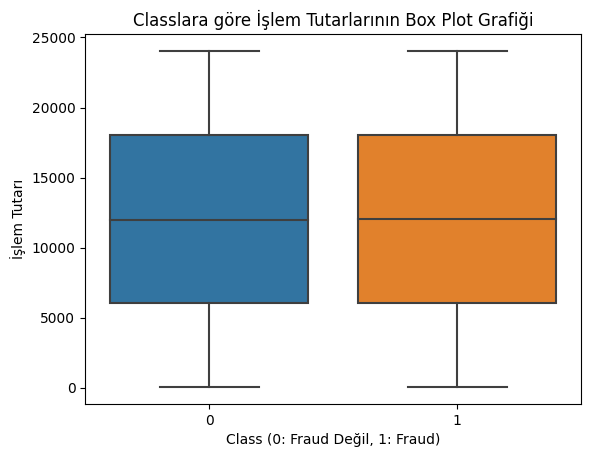

In [20]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Classlara göre İşlem Tutarlarının Box Plot Grafiği")
plt.xlabel("Class (0: Fraud Değil, 1: Fraud)")
plt.ylabel("İşlem Tutarı")
plt.show()


# Veri Setimizi Güvene Alıyoruz

In [21]:
df= df.drop('z_score',axis=1)

In [22]:
data = df.copy()

In [23]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [24]:
df1 = df.copy()

In [25]:
df1.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Feature Engineering(Özellik Mühendisliği)
**Feature engineering (özellik mühendisliği), makine öğrenimi modellerinin performansını artırmak ve daha iyi tahminler yapmasını sağlamak için veri setindeki özellikleri dönüştürme, yeni özellikler oluşturma veya mevcutları yeniden düzenleme işlemidir.**

Model Performansını Artırmak: Daha anlamlı ve iyi tasarlanmış özellikler, modelin doğruluğunu artırır.
Veri Setindeki Eksiklikleri Gidermek: Eksik veya hatalı verileri temizlemek ve dönüştürmek gerekir.
Aykırı Değerlerin Etkisini Azaltmak: Aykırı değerleri işlemek modeli daha kararlı hale getirir.
Karmaşık İlişkileri Ortaya Çıkarmak: Özellikler arasındaki ilişkileri keşfetmek ve model için daha anlamlı hale getirmek.
Özelliklerin Ölçeklendirilmesi: Modelin hızlı ve etkili öğrenmesini sağlamak için veriler aynı ölçeklerde olmalıdır.


**Modelde Kullanılmayacak Değişkenlerin Kaldırılması**

In [26]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**id sütunun modelimizde herehangi bir analam ifade etmeyeceğinden kaldırdık**

In [27]:
df = df.drop(columns=['id'])

**İşlem Tutarını Standartlaştırılması**

In [28]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [29]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


**Daha güçlü  model için güçlü bir bir özellik türetmek için mevcut sütunları analiz edip, yeni bir özellik oluşturuyoruz.**

**Etkileşim Özelliği Türetme**

In [30]:
df['V1_Amount_Interaction'] = df['V1'] * df['Amount']

**Doğrusal Olmayan Özellikler Ekleme**

In [31]:
df['V1_Squared'] = df['V1'] ** 2

**Log Transformation ile Yeni Özellik**

In [32]:
df['Log_Amount'] = np.log1p(df['Amount'])

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Standartlaştırılmış Özellik**

In [33]:

df['V1_Amount_Interaction_Scaled'] = scaler.fit_transform(df[['V1_Amount_Interaction']])


**Korelasyon Analizi**

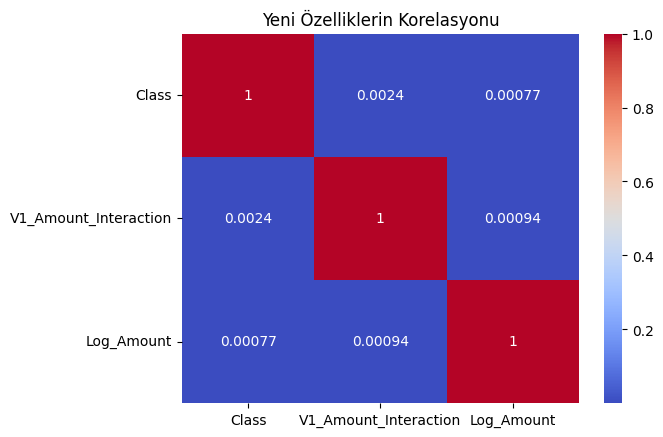

In [34]:
correlation = df[['Class', 'V1_Amount_Interaction', 'Log_Amount']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Yeni Özelliklerin Korelasyonu")
plt.show()

**Özellik Kombinasyonları**

In [35]:
df['V1_V2_Interaction'] = df['V1'] * df['V2']
df['V3_V4_Interaction'] = df['V3'] * df['V4']

 **İstatistiksel Özellikler Türetme**

In [36]:
df['Mean_V1_V2'] = df[['V1', 'V2']].mean(axis=1) #ortlama 

In [37]:
df['Std_V1_V2'] = df[['V1', 'V2']].std(axis=1) #standart sapma

In [38]:
df['Var_V1_V2'] = df[['V1', 'V2']].var(axis=1) #varyans

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V1_Amount_Interaction,V1_Squared,Log_Amount,V1_Amount_Interaction_Scaled,V1_V2_Interaction,V3_V4_Interaction,Mean_V1_V2,Std_V1_V2,Var_V1_V2
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0,-0.223752,0.067937,0.619741,-0.222209,0.122413,-0.208997,-0.365148,0.147786,0.021841
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0,-0.784503,0.970421,-1.591447,-0.782295,-0.350740,-0.239771,0.314527,0.948333,0.899335
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0,0.358397,0.067741,NaN,0.359251,0.247098,-0.791647,-0.604828,0.487276,0.237438
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0,0.146388,0.023150,-3.273314,0.147494,0.077439,-1.904366,-0.330555,0.252300,0.063655
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0,-0.066862,0.042774,0.280117,-0.065504,0.034183,-0.684567,-0.186050,0.029373,0.000863


**Anonimleştirilmiş Özelliklerin Korelasyonu**

In [40]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'V1_Amount_Interaction', 'V1_Squared', 'Log_Amount',
       'V1_Amount_Interaction_Scaled', 'V1_V2_Interaction',
       'V3_V4_Interaction', 'Mean_V1_V2', 'Std_V1_V2', 'Var_V1_V2'],
      dtype='object')

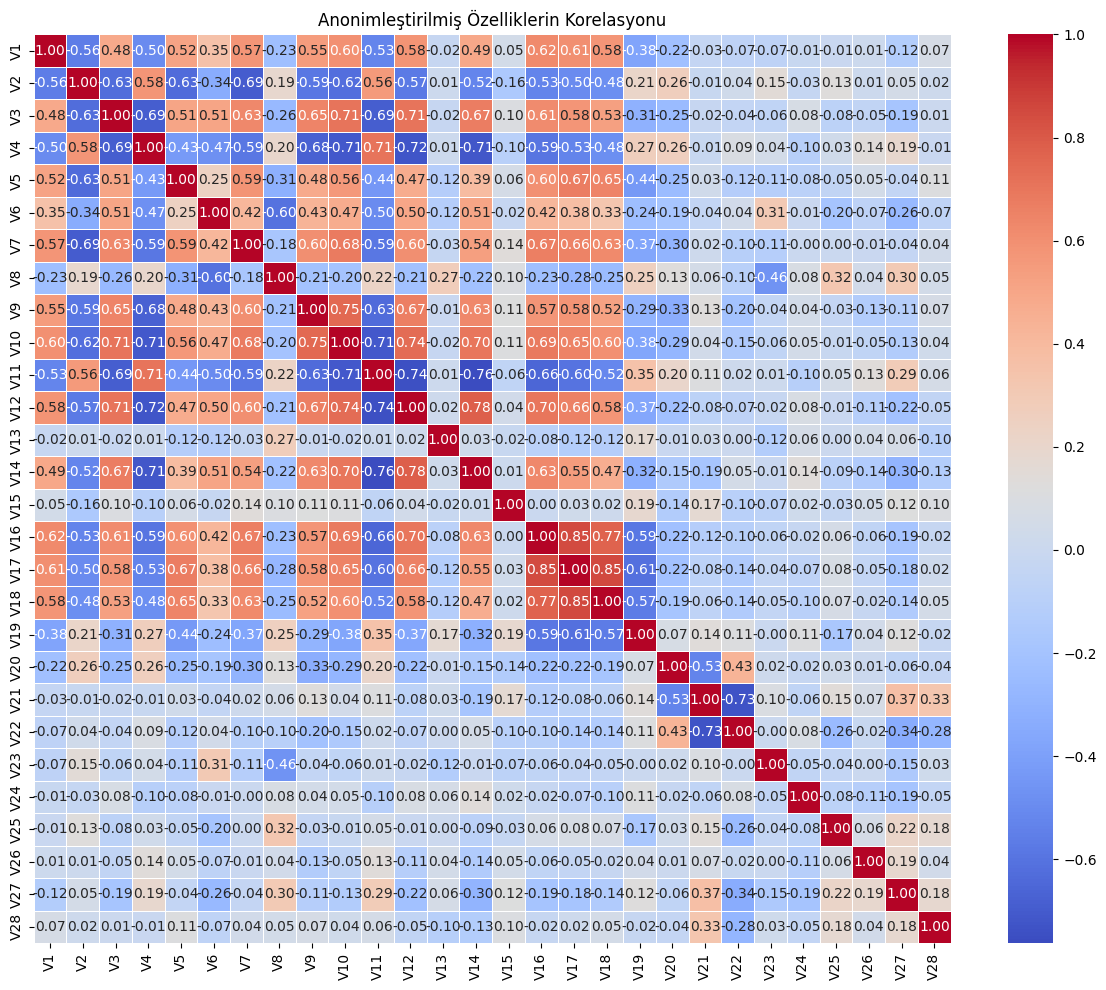

In [41]:

# Korelasyon matrisini hesaplayalım
correlation = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                  'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                  'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].corr()

# Korelasyon matrisini ısı haritası olarak görselleştirelim
plt.figure(figsize=(12, 10))  # Grafik boyutunu ayarlayalım
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)

# Başlık ve etiketler
plt.title("Anonimleştirilmiş Özelliklerin Korelasyonu")
plt.tight_layout()

# Görselleştirmeyi gösterelim
plt.show()


Yüksek Korelasyonlu Değişken Çiftleri:
  Feature 1 Feature 2  Correlation
0       V16       V17     0.848095
1       V17       V16     0.848095
2       V17       V18     0.851366
3       V18       V17     0.851366


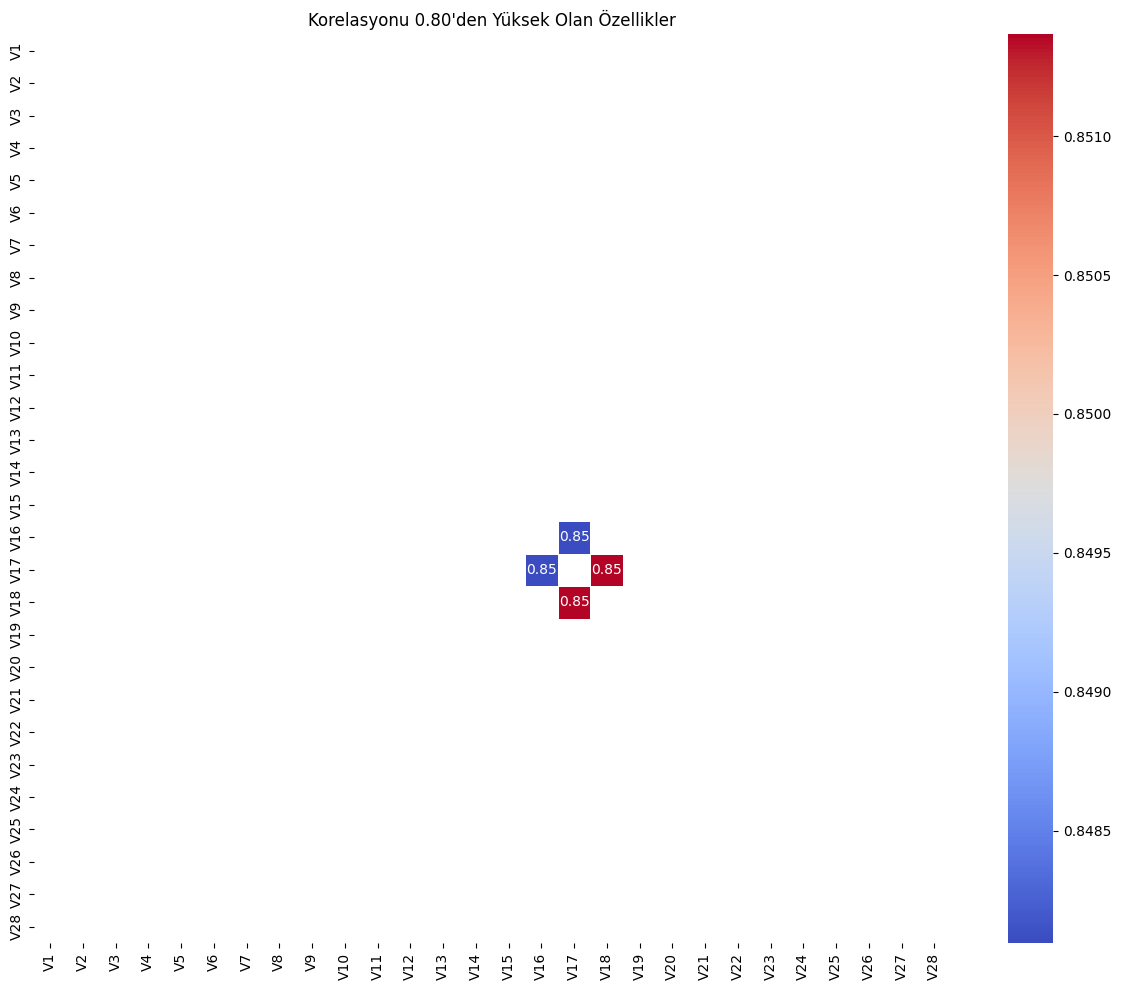

In [42]:

correlation = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
                  'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                  'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].corr()

# Korelasyon değerinin mutlak değeri 0.80'den büyük olanları bulalım
high_corr = correlation[correlation.abs() > 0.80]

# 1.0 korelasyonunu çıkaralım çünkü bu, değişkenlerin kendileriyle olan korelasyonudur
high_corr = high_corr[high_corr < 1.0]

# Korelasyonu 0.80'den büyük olan değişken çiftlerini göstermek
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Yüksek korelasyonlu değişken çiftlerini yazdıralım
print("Yüksek Korelasyonlu Değişken Çiftleri:")
print(high_corr_pairs)

# Maskelenmiş korelasyon matrisini görselleştirelim
plt.figure(figsize=(12, 10))  # Grafik boyutunu ayarlayalım
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, mask=~(high_corr.abs() > 0.80))

# Başlık ve etiketler
plt.title("Korelasyonu 0.80'den Yüksek Olan Özellikler")
plt.tight_layout()

# Görselleştirmeyi gösterelim
plt.show()

**V16,V17  VE V17,V18 DEĞİŞKENLERİNİ KORELASYONLARI YÜKSEK ÇIKTIĞINDAN GRUPLANDIRALIM**

In [43]:
# Korelasyonu yüksek olan değişkenleri gruplayalım

# V16 ve V17'nin ortalamasını alalım
df['V16_V17_Group'] = (df['V16'] + df['V17']) / 2

# V17 ve V18'in ortalamasını alalım
df['V17_V18_Group'] = (df['V17'] + df['V18']) / 2

# İlk birkaç satırı kontrol edelim
print(df[['V16', 'V17', 'V18', 'V16_V17_Group', 'V17_V18_Group']].head())

        V16       V17       V18  V16_V17_Group  V17_V18_Group
0  0.215598  0.512307  0.333644       0.363952       0.422975
1  0.789188  0.403810  0.201799       0.596499       0.302805
2 -0.577514  0.886526  0.239442       0.154506       0.562984
3 -0.030669  0.242629  2.178616       0.105980       1.210623
4  0.224538  0.366466  0.291782       0.295502       0.329124


In [44]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V1_Amount_Interaction,V1_Squared,Log_Amount,V1_Amount_Interaction_Scaled,V1_V2_Interaction,V3_V4_Interaction,Mean_V1_V2,Std_V1_V2,Var_V1_V2,V16_V17_Group,V17_V18_Group
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0,-0.223752,0.067937,0.619741,-0.222209,0.122413,-0.208997,-0.365148,0.147786,0.021841,0.363952,0.422975
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0,-0.784503,0.970421,-1.591447,-0.782295,-0.350740,-0.239771,0.314527,0.948333,0.899335,0.596499,0.302805
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0,0.358397,0.067741,NaN,0.359251,0.247098,-0.791647,-0.604828,0.487276,0.237438,0.154506,0.562984
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0,0.146388,0.023150,-3.273314,0.147494,0.077439,-1.904366,-0.330555,0.252300,0.063655,0.105980,1.210623
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0,-0.066862,0.042774,0.280117,-0.065504,0.034183,-0.684567,-0.186050,0.029373,0.000863,0.295502,0.329124


In [45]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'V1_Amount_Interaction', 'V1_Squared', 'Log_Amount',
       'V1_Amount_Interaction_Scaled', 'V1_V2_Interaction',
       'V3_V4_Interaction', 'Mean_V1_V2', 'Std_V1_V2', 'Var_V1_V2',
       'V16_V17_Group', 'V17_V18_Group'],
      dtype='object')

# Diğer Değişkenlerin biribiri Arasında Korelasyonları

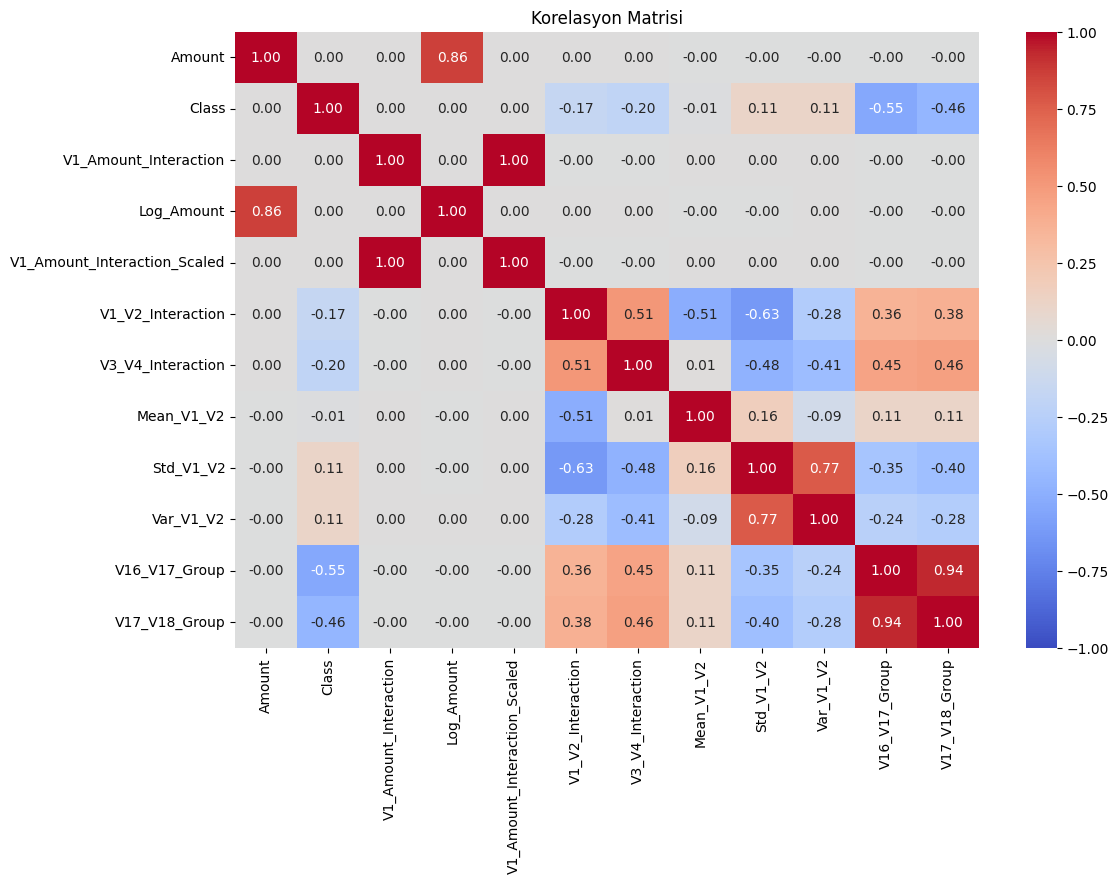

                                Amount  Class  V1_Amount_Interaction  \
Amount                        1.000000    NaN                    NaN   
Class                              NaN    1.0                    NaN   
V1_Amount_Interaction              NaN    NaN                    1.0   
Log_Amount                    0.864834    NaN                    NaN   
V1_Amount_Interaction_Scaled       NaN    NaN                    1.0   
V1_V2_Interaction                  NaN    NaN                    NaN   
V3_V4_Interaction                  NaN    NaN                    NaN   
Mean_V1_V2                         NaN    NaN                    NaN   
Std_V1_V2                          NaN    NaN                    NaN   
Var_V1_V2                          NaN    NaN                    NaN   
V16_V17_Group                      NaN    NaN                    NaN   
V17_V18_Group                      NaN    NaN                    NaN   

                              Log_Amount  V1_Amount_Interaction

In [46]:
# İlgili değişkenler
selected_columns = ['Amount', 'Class', 'V1_Amount_Interaction', 'Log_Amount',
                    'V1_Amount_Interaction_Scaled', 'V1_V2_Interaction', 'V3_V4_Interaction',
                    'Mean_V1_V2', 'Std_V1_V2', 'Var_V1_V2', 'V16_V17_Group', 'V17_V18_Group']

# Korelasyon matrisini hesaplayalım
correlation_matrix = df[selected_columns].corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

# Yüksek korelasyonları (0.8 ve üzeri) filtreleyelim
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.8]

# Yüksek korelasyonları yazdıralım
print(high_correlation)


In [47]:
# Yüksek korelasyona sahip olan sütunları silme
df = df.drop(columns=['V1_Amount_Interaction_Scaled', 'V16_V17_Group','V1_Squared', 'Log_Amount','V17_V18_Group','V17'])

In [48]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'V1_Amount_Interaction', 'V1_V2_Interaction', 'V3_V4_Interaction',
       'Mean_V1_V2', 'Std_V1_V2', 'Var_V1_V2'],
      dtype='object')

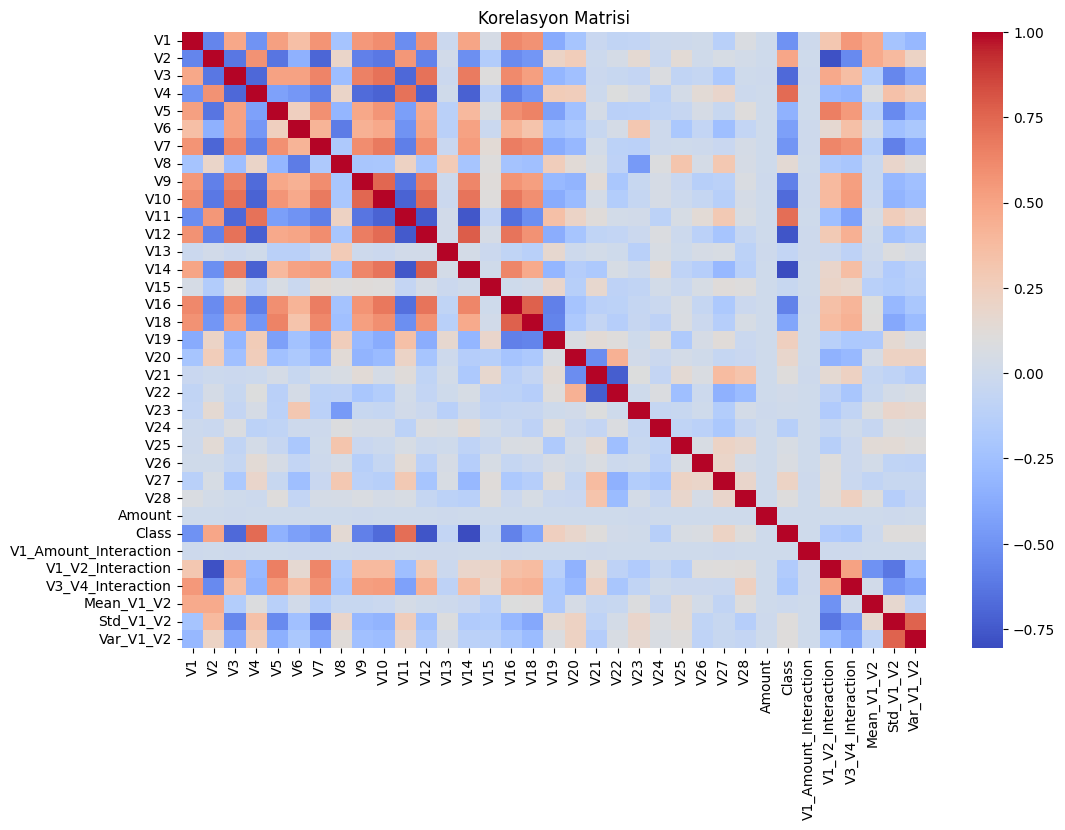

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

# MODEL SELECTİON(MODEL KURULUMU)

In [50]:

# Özellikleri ve hedefi ayırma
X = df.drop(columns=['Class'],axis=1)
y = df['Class']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)



In [51]:
# Model oluşturma
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)

# Model performansını yazdırma
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56842    21]
 [    0 56863]]


In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print(accuracy_score(y_test,y_pred))

0.999815345655347


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Modelinizi tanımlayın
rf = RandomForestClassifier(random_state=42)

# Çapraz doğrulama ile modelin doğruluğunu değerlendirin
cv_scores = cross_val_score(rf, X, y, cv=3, scoring='accuracy')

# Çapraz doğrulama sonuçları
print(f'Çapraz doğrulama ile doğruluk skorları: {cv_scores}')
print(f'Ortalama doğruluk: {np.mean(cv_scores)}')
print(f'Karmaşıklık: {np.std(cv_scores)}')


Çapraz doğrulama ile doğruluk skorları: [0.99959904 0.99980479 0.99975731]
Ortalama doğruluk: 0.9997203807772067
Karmaşıklık: 8.796498753135609e-05


In [55]:
def plot_importance_ensemble(model, features, num=len(X)):
    
    feature_imp_df = pd.DataFrame(0, index=features.columns, columns=["Value"])
    
    
    for model in model.estimators_:
        if hasattr(model, 'feature_importances_'):
            
            feature_imp_df["Value"] += model.feature_importances_/100

    
    feature_imp_df["Feature"] = features.columns
    feature_imp_df = feature_imp_df.sort_values(by="Value", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.set(font_scale=1)
    ax = sns.barplot(x="Value", y="Feature", data=feature_imp_df[0:num])
    
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.4f'),
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=8)
    
    plt.title("Feature Importance -  Classifier")
    plt.tight_layout()
    plt.show()

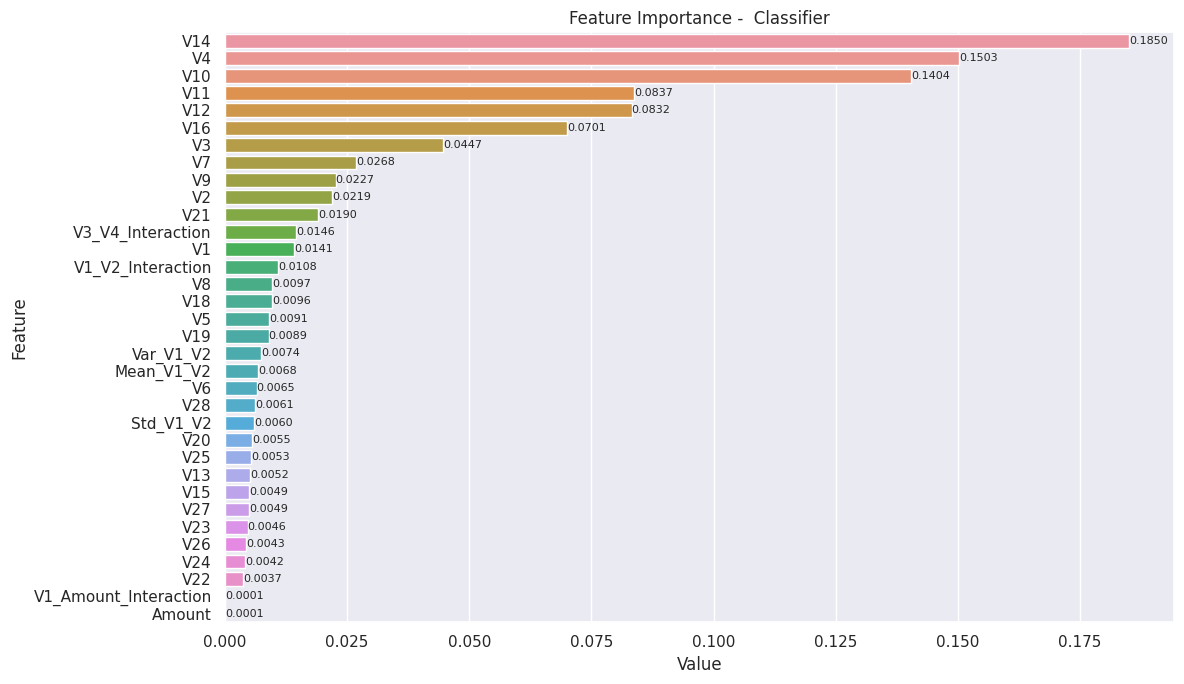

In [56]:
plot_importance_ensemble(model,X)

**Modelimizde en  çok tahmin skorunu etkileyen özellik V14 olmuştur bu sebeple V14  bizim için Frud tahmini sürecinde  kritik rol oynamaktadır bunun yanı sıra V12,V4,V11 özellikleri de farud izlenim sürecinde önemli bir özellik göstermektedir.**